# House Price Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from model_utils import report, cv_scores

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

## Data Preprecessing

### Importing the dataset

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

### Splitting the dataset into the Training set and Test set 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

In [5]:
X_train_sc = X_train_sc.reshape(X_train_sc.shape[0], X_train_sc.shape[1], 1)
X_test_sc = X_test_sc.reshape(X_test_sc.shape[0], X_test_sc.shape[1], 1)

## Training the CNN model

In [6]:
seed_value = 187372311

import random
random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

np.random.seed(seed_value)

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

In [7]:
def create_cnn(optimizer='adam'):
  n_features = 27

  # Initialising the CNN
  cnn = keras.models.Sequential()

  # Convolution
  cnn.add(keras.layers.Conv1D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(n_features, 1)))

  # Adding a second convolutional layer
  cnn.add(keras.layers.Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"))

  # Flattening
  cnn.add(keras.layers.Flatten())

  # Full Connection
  cnn.add(keras.layers.Dense(units=128, activation='relu'))

  # Output Layer
  cnn.add(keras.layers.Dense(units=1, activation='linear'))

  cnn.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

  return cnn

model = KerasRegressor(build_fn=create_cnn, epochs=195)
model.fit(X_train_sc, y_train_sc, verbose = 2, batch_size=64)

Epoch 1/195
14/14 - 1s - loss: 0.4516 - mae: 0.5352
Epoch 2/195
14/14 - 0s - loss: 0.1813 - mae: 0.3289
Epoch 3/195
14/14 - 0s - loss: 0.1365 - mae: 0.2885
Epoch 4/195
14/14 - 0s - loss: 0.1158 - mae: 0.2618
Epoch 5/195
14/14 - 0s - loss: 0.1066 - mae: 0.2523
Epoch 6/195
14/14 - 0s - loss: 0.1016 - mae: 0.2448
Epoch 7/195
14/14 - 0s - loss: 0.0925 - mae: 0.2338
Epoch 8/195
14/14 - 0s - loss: 0.0824 - mae: 0.2216
Epoch 9/195
14/14 - 0s - loss: 0.0779 - mae: 0.2157
Epoch 10/195
14/14 - 0s - loss: 0.0736 - mae: 0.2099
Epoch 11/195
14/14 - 0s - loss: 0.0688 - mae: 0.2018
Epoch 12/195
14/14 - 0s - loss: 0.0650 - mae: 0.1972
Epoch 13/195
14/14 - 0s - loss: 0.0612 - mae: 0.1893
Epoch 14/195
14/14 - 0s - loss: 0.0596 - mae: 0.1923
Epoch 15/195
14/14 - 0s - loss: 0.0550 - mae: 0.1793
Epoch 16/195
14/14 - 0s - loss: 0.0494 - mae: 0.1704
Epoch 17/195
14/14 - 0s - loss: 0.0482 - mae: 0.1696
Epoch 18/195
14/14 - 0s - loss: 0.0435 - mae: 0.1622
Epoch 19/195
14/14 - 0s - loss: 0.0438 - mae: 0.1628
Ep

### Cross Validation

Epoch 1/195
22/22 [==============================] - 1s 4ms/step - loss: 0.5239 - mae: 0.5620
Epoch 2/195
22/22 [==============================] - 0s 4ms/step - loss: 0.1661 - mae: 0.3124
Epoch 3/195
22/22 [==============================] - 0s 4ms/step - loss: 0.1195 - mae: 0.2637
Epoch 4/195
22/22 [==============================] - 0s 4ms/step - loss: 0.0981 - mae: 0.2443
Epoch 5/195
22/22 [==============================] - 0s 4ms/step - loss: 0.0908 - mae: 0.2375
Epoch 6/195
22/22 [==============================] - 0s 4ms/step - loss: 0.0795 - mae: 0.2168
Epoch 7/195
22/22 [==============================] - 0s 4ms/step - loss: 0.0633 - mae: 0.1984
Epoch 8/195
22/22 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.1901
Epoch 9/195
22/22 [==============================] - 0s 4ms/step - loss: 0.0572 - mae: 0.1847
Epoch 10/195
22/22 [==============================] - 0s 4ms/step - loss: 0.0599 - mae: 0.1962
Epoch 11/195
22/22 [==============================] - 0s 4m

,Scores
Split 1,0.93095
Split 2,0.89080
Split 3,0.87472
Split 4,0.92504
Split 5,0.93073
CV Score,0.91045


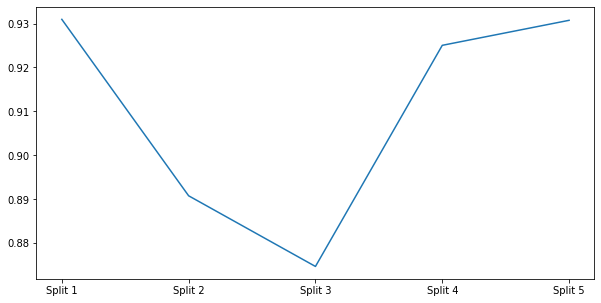

In [8]:
cv_scores(model, X_train_sc, y_train_sc, cv=5)

### Testing data

,Value
Metric,
R2 Score,0.944156
MAE,35784.833142
RMSE,49470.286171


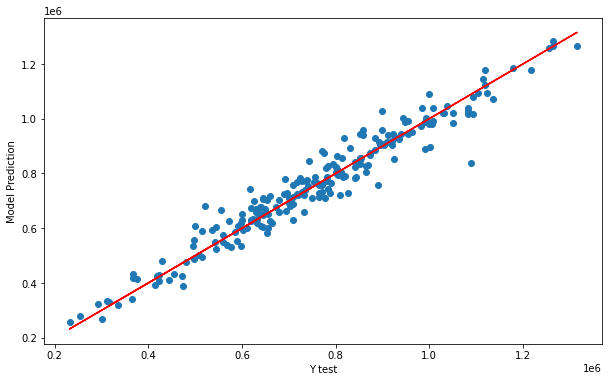

In [9]:
y_pred = model.predict(X_test_sc)
report(y_test, sc_y.inverse_transform(y_pred))

In [10]:
model.model.save('cnn.h5')